# Classification

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

This time, we will use the breast cancers dataset from wisconsin. https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/wisc_bc_data.csv. Load it as a dataframe in _df_ variable.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/wisc_bc_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remove the first column (id).

In [4]:
del df['id']

How is the diagnosis feature distributed?

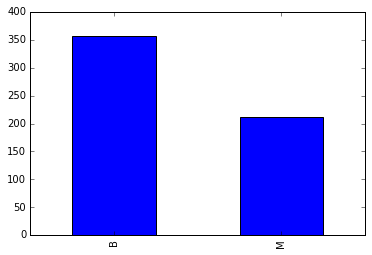

In [5]:
df['diagnosis'].value_counts().plot(kind='bar');

# Data Preparation

Describe variables "radius_mean", "texture_mean" and "area_mean".

In [6]:
print(df[["radius_mean", "texture_mean", "area_mean"]].describe())

       radius_mean  texture_mean    area_mean
count   569.000000    569.000000   569.000000
mean     14.127292     19.289649   654.889104
std       3.524049      4.301036   351.914129
min       6.981000      9.710000   143.500000
25%      11.700000     16.170000   420.300000
50%      13.370000     18.840000   551.100000
75%      15.780000     21.800000   782.700000
max      28.110000     39.280000  2501.000000


Show data type of each feature/column.

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Normalize all features except diagnosis with the min-max normalization function.

In [8]:
def norm_minmax(x):
    return(np.subtract(x, min(x)) / (max(x) - min(x)))

In [9]:
y = df['diagnosis']
X = df[df.columns.difference(['diagnosis'])].apply(norm_minmax, 'index', raw = True)

In [10]:
X.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,0.363733,0.273811,0.450698,0.792037,0.351398,0.619292,0.731113,0.300625,0.912027,0.703140,...,0.620776,0.593753,0.159296,0.601136,0.686364,0.311645,0.598462,0.022658,0.120469,0.141525
1,0.501591,0.125660,0.435214,0.181768,0.081323,0.154563,0.348757,0.253836,0.639175,0.203608,...,0.606901,0.289880,0.119387,0.347553,0.379798,0.084539,0.233590,0.272574,0.082589,0.303571
2,0.449417,0.162922,0.374508,0.431017,0.283955,0.385375,0.635686,0.389847,0.835052,0.462512,...,0.556386,0.514309,0.150831,0.483590,0.509596,0.205690,0.403706,0.390260,0.094303,0.360075
3,0.102906,0.038155,0.094008,0.811361,0.543215,0.814012,0.522863,0.353665,0.884880,0.565604,...,0.248310,0.811321,0.251453,0.915472,0.776263,0.728148,1.000000,0.360839,0.175875,0.385928
4,0.489290,0.163688,0.341575,0.347893,0.167918,0.172415,0.518390,0.357075,0.558419,0.463918,...,0.519744,0.430351,0.332359,0.437364,0.378283,0.136179,0.157500,0.156578,0.093065,0.123934


Split the data into a test (20%) and train set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2017)

# K Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Predict the diagnosis from the test set based on 5 points using euclidean distance metric.

In [13]:
m_km = KNeighborsClassifier(n_neighbors=5, weights='distance')
m_km.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [14]:
yhat_km_test = m_km.predict(X=X_test)

Calculate the confusion matrix with sklearn.metrics.

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test, yhat_km_test)

array([[79,  0],
       [ 2, 33]], dtype=int64)

We +/- reuse the code from [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to plot a better confusion matrix visualisation.

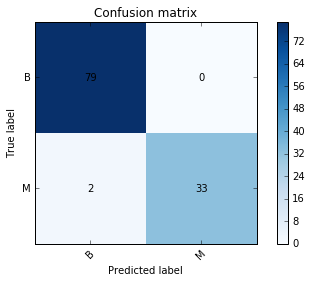

In [17]:
def confusion_matrix_plot(y_true, y_test, label_dict=None, title='Confusion matrix', cmap=None):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Variable preparation
    if cmap is None: cmap = plt.cm.Blues
    y_unique = np.unique(np.hstack((y_true, y_test))) # sorted
    if label_dict is None: label_dict = dict(zip(y_unique, y_unique))
    
    # Calculate confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true=y_true, y_pred=y_test, labels=y_unique) 
    
    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    tick_marks = np.arange(len(y_unique))
    plt.xticks(tick_marks, [label_dict[x] for x in y_unique], rotation=45)
    plt.yticks(tick_marks, [label_dict[x] for x in y_unique])
    plt.tight_layout()

    # Put quantities in squares
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
            
confusion_matrix_plot(y_test, yhat_km_test)

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

Train a model based on Naive Bayes with the train data, and show the model parameters.

In [19]:
m_nb = GaussianNB()
m_nb.fit(X=X_train, y=y_train)

GaussianNB(priors=None)

Predict the labels of the test data, using the trained model

In [20]:
yhat_nb_test = m_nb.predict(X=X_test)

What does the confusion matrix look like?

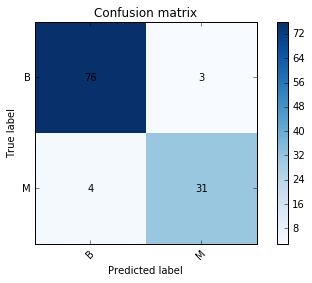

In [21]:
confusion_matrix_plot(y_test, yhat_nb_test)

# Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

Train a logistic model with the train data.

In [23]:
m_logit = LogisticRegression()
m_logit.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Show the coefficients of the model.

In [24]:
m_logit.coef_

array([[ 1.10623979,  0.87476032,  1.49457907,  0.40905139, -0.52149027,
         0.83056318,  2.35146004, -0.01753778,  2.32044609,  1.72422491,
        -0.40187513,  1.27707837, -1.47744673, -0.6480444 ,  0.20824639,
         0.90442158,  1.00768155,  1.60955949,  0.83983638,  1.25932075,
         1.68713813, -0.41595565, -0.28693575,  0.55229359, -0.27237219,
        -0.51890095,  0.78930533,  0.81380262, -0.28361369,  1.38648322]])

Predict the labels of the test data, using the trained model.

In [25]:
yhat_logit_test = m_logit.predict(X=X_test)

What does the confusion matrix look like?

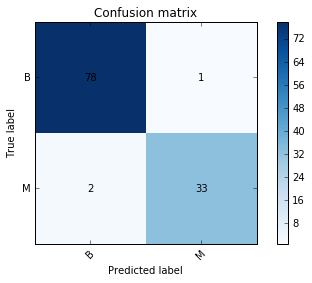

In [26]:
confusion_matrix_plot(y_test, yhat_logit_test)

# Decision trees

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

Train a logistic model with the train data. Limit the number of leafs to 5.

In [28]:
m_tree = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 2017)
m_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2017, splitter='best')

Show the decision tree.

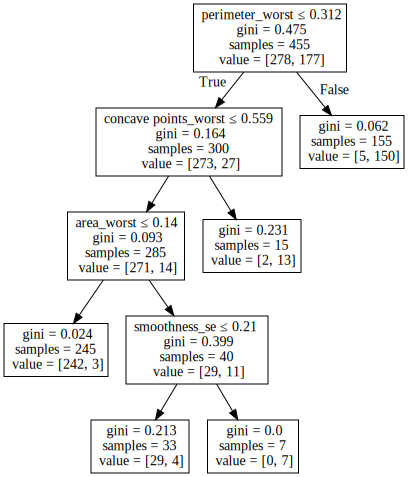

In [29]:
graphviz.Source(export_graphviz(m_tree, out_file = None, feature_names = list(X), special_characters=True))

What does the confusion matrix look like?

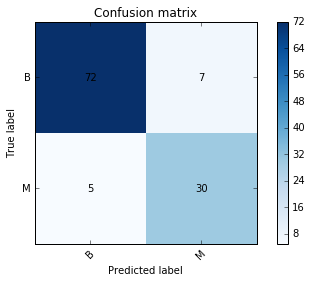

In [30]:
yhat_tree_test = m_tree.predict(X=X_test)
confusion_matrix_plot(y_test, yhat_tree_test)

Note that sklearn uses an [optimized CART algorithm](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart) for making trees using either the Gini or Cross-Entropy as measures of impurity.

# Ensembles

## Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

If one tree doesn't preform well enough, one can use multiple. Each tree will have a vote. Train a random forest classifier with 5 trees and max 5 nodes in each.

In [32]:
m_rf = RandomForestClassifier(n_estimators = 5, max_leaf_nodes = 5, random_state = 2017)
m_rf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)

What does the confusion matrix look like?

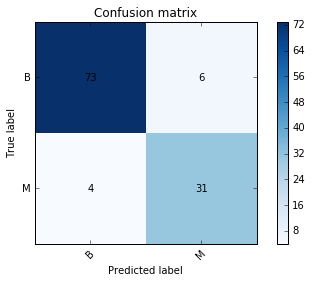

In [33]:
yhat_rf_test = m_rf.predict(X=X_test)
confusion_matrix_plot(y_test, yhat_rf_test)

What are the most important features for the model?

In [34]:
sorted(list(zip(X.columns, m_rf.feature_importances_)), key=lambda x: x[1], reverse=True)

[('perimeter_worst', 0.39522096666712336),
 ('area_worst', 0.18398290637597497),
 ('concave points_worst', 0.17068808993724177),
 ('concavity_mean', 0.1602839435643284),
 ('smoothness_worst', 0.013024901429437356),
 ('concavity_se', 0.012754987399105782),
 ('texture_mean', 0.012362788588705462),
 ('texture_worst', 0.01071746173211675),
 ('concavity_worst', 0.010483207889727765),
 ('concave points_mean', 0.010360649919548092),
 ('fractal_dimension_se', 0.0096965056939360486),
 ('perimeter_se', 0.006578776962569555),
 ('texture_se', 0.0038448138401846687),
 ('area_mean', 0.0),
 ('area_se', 0.0),
 ('compactness_mean', 0.0),
 ('compactness_se', 0.0),
 ('compactness_worst', 0.0),
 ('concave points_se', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('fractal_dimension_worst', 0.0),
 ('perimeter_mean', 0.0),
 ('radius_mean', 0.0),
 ('radius_se', 0.0),
 ('radius_worst', 0.0),
 ('smoothness_mean', 0.0),
 ('smoothness_se', 0.0),
 ('symmetry_mean', 0.0),
 ('symmetry_se', 0.0),
 ('symmetry_worst', 0.0)

## Gradient Tree Boosting

Now do the same with gradient boosting.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

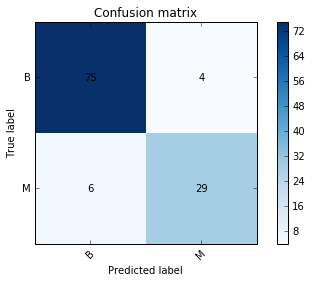

In [36]:
m_gb = GradientBoostingClassifier(n_estimators = 5, max_leaf_nodes = 5, random_state = 2017)
m_gb.fit(X=X_train, y=y_train)
yhat_gb_test = m_gb.predict(X=X_test)
confusion_matrix_plot(y_test, yhat_gb_test)

# Neural network

In [37]:
from sklearn.neural_network import MLPClassifier

Fit a 2-layer - with 5 nodes in first and 2 nodes is second layer - perceptron with relu as the activation function for hidden layers.

In [38]:
m_nn = MLPClassifier(hidden_layer_sizes = (5,2), max_iter = 10000, random_state = 2017)
m_nn.fit(X=X_train, y=y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2017,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Display the weights?

In [39]:
m_nn.coefs_

[array([[-0.62305694,  0.18702781, -0.03007814, -0.35326093,  0.81121046],
        [-1.17077502, -0.33101946, -1.04581402, -1.22376589,  0.50613031],
        [-1.1215261 ,  0.07417834, -0.5417504 , -0.76129094,  0.70785691],
        [ 0.06365928,  0.33144483,  0.00580989, -0.15168009,  0.43623134],
        [ 0.31608891, -0.19344785,  0.44896185,  0.37785653,  0.05849526],
        [-0.02825881, -0.05715701, -0.42490911,  0.0346466 ,  0.51619005],
        [-1.27323619, -0.37720705, -0.35014778, -0.67471299,  0.75726949],
        [ 0.7455045 , -0.10705589,  0.02635346,  0.50296689,  0.20395074],
        [-0.23417388,  0.30814178, -0.44878991, -0.51779799,  0.13216772],
        [-0.78431089,  0.10320806, -0.51543863, -0.53863548,  0.90433827],
        [ 0.46192435,  0.33451561,  0.45701662,  0.3512143 ,  0.01788091],
        [-0.65330419, -0.14780172, -0.39516298,  0.04940447,  0.6143465 ],
        [ 0.69810857, -0.22914938,  0.91357555,  0.60202876, -0.03025319],
        [ 0.37736353, -0.

Show the confusion matrix for the test set.

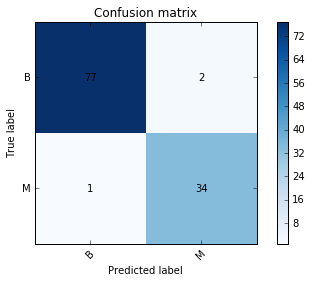

In [40]:
yhat_nn_test = m_nn.predict(X=X_test)
confusion_matrix_plot(y_test, yhat_nn_test)

# Support Vector Machines

In [41]:
from sklearn.svm import SVC

Train the model and show the confusion matrix based on test set.

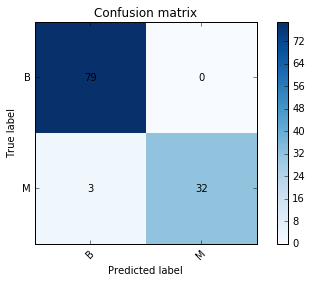

In [42]:
m_svm = SVC()
m_svm.fit(X=X_train, y=y_train)
yhat_svm_test = m_svm.predict(X=X_test)
confusion_matrix_plot(y_test, yhat_svm_test)